<a href="https://colab.research.google.com/github/Ferhadaghayev/Accounting-Dataset/blob/main/Accounting_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import pandas as pd
import numpy as np

np.random.seed(10)

kreditorlar = ["Vergi Xidməti", "Azersu", "Azercell", "OfficeMart", "LogiTrans", "Delta LTD"]
dates = pd.date_range("2024-01-01", "2024-12-31")

data = []

for i in range(300):
    kreditor = np.random.choice(kreditorlar)
    bill_no = f"AP{i+1:04}"
    amount = np.random.randint(200, 8000)
    bill_date = np.random.choice(dates)
    due_date = bill_date + pd.Timedelta(days=np.random.randint(15,45))
    paid = np.random.choice(["Nağd","Kart"], p=[0.65,0.35])

    data.append([kreditor, bill_no, amount, bill_date, due_date, paid])

df_borc = pd.DataFrame(data, columns=[
    "Vendor","Bill_No","Amount","Bill_Date","Due_Date","Paid"
])

,Tarix,Sened_No,Musteri,Kateqoriya,Təsvir,Gəlir,Xərc,Ödəniş_növü
0,2024-04-12,TX0001,Daxili,Ofis,Ofis əməliyyatı,0,960,Kart
1,2024-04-16,TX0002,Daxili,Marketinq,Marketinq əməliyyatı,0,1738,Bank
2,2024-08-02,TX0003,Daxili,Vergi,Vergi əməliyyatı,0,1582,Nağd
3,2024-04-09,TX0004,Daxili,Vergi,Vergi əməliyyatı,0,1785,Nağd
4,2024-09-14,TX0005,Daxili,Ofis,Ofis əməliyyatı,0,2953,Bank
...,...,...,...,...,...,...,...,...
995,2024-06-08,TX0996,Orion Group,Satış,Satış əməliyyatı,2952,0,Nağd
996,2024-11-18,TX0997,Daxili,Ofis,Ofis əməliyyatı,0,2551,Nağd
997,2024-04-03,TX0998,Daxili,Vergi,Vergi əməliyyatı,0,2865,Nağd
998,2024-09-30,TX0999,Daxili,Marketinq,Marketinq əməliyyatı,0,215,Nağd


In [406]:
#Aprel ayından sonra 130 nağd, 71 kartla ödəniş olub
counts = df_after_april["Paid"].value_counts()
print(counts)

Paid
Nağd    130
Kart     71
Name: count, dtype: int64


In [409]:
#Hansı hesaba nə qədər borcumuz olduğuna baxırıq
borc_by_vendor = df_borc.groupby('Vendor')['Amount'].sum()
print(borc_by_vendor)

Vendor
Azercell         191559
Azersu           251987
Delta LTD        167719
LogiTrans        231050
OfficeMart       189722
Vergi Xidməti    206181
Name: Amount, dtype: int64


In [410]:
#Ödənilmiş və ödənilməmiş borclar
paid_unpaid_by_vendor = df_borc.groupby(['Vendor','Paid'])['Amount'].sum().unstack(fill_value=0)
print(paid_unpaid_by_vendor)

Paid            Kart    Nağd
Vendor                      
Azercell       34631  156928
Azersu         61392  190595
Delta LTD      51590  116129
LogiTrans      62906  168144
OfficeMart     75339  114383
Vergi Xidməti  87086  119095


In [389]:
from datetime import datetime #Ümumi gecikmiş borc sayı
today = pd.Timestamp(datetime.today())
gecikmis_borc = df_borc[(df_borc['Paid']=='No') & (df_borc['Due_Date'] < today)]

print("Ümumi gecikmiş borc sayı:", len(gecikmis_borc))

Ümumi gecikmiş borc sayı: 0


In [390]:
#Ay sütunu əlavə edirik
df_borc['Month'] = df_borc['Bill_Date'].dt.to_period('M')

#Hər ay üzrə borcun cəmi
monthly_borc = df_borc.groupby('Month')['Amount'].sum()
print(monthly_borc)

Month
2024-01    134701
2024-02     79452
2024-03    108344
2024-04     94710
2024-05    126591
2024-06    110510
2024-07     79072
2024-08    125817
2024-09     76455
2024-10    114216
2024-11    120957
2024-12     67393
Freq: M, Name: Amount, dtype: int64


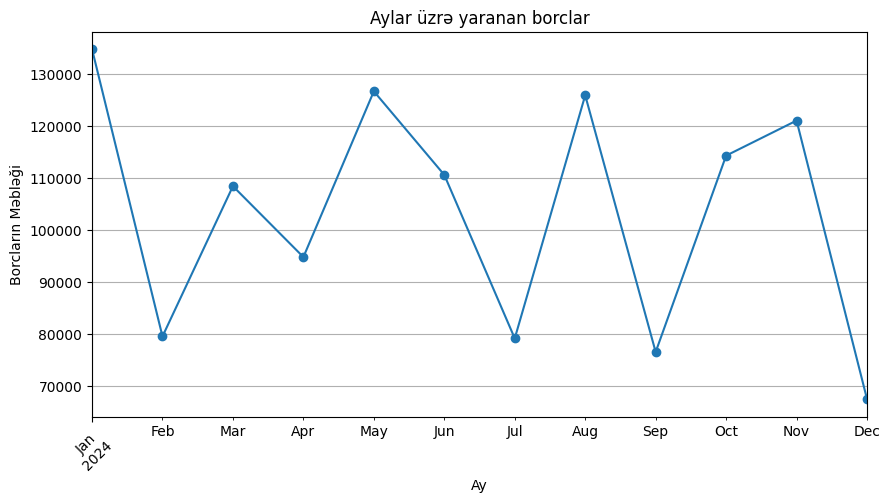

In [391]:
import matplotlib.pyplot as plt  #aylar üzrə borcların məbləğləri

plt.figure(figsize=(10,5))
monthly_borc.plot(marker='o')
plt.title("Aylar üzrə yaranan borclar")
plt.ylabel("Borcların Məbləği")
plt.xlabel("Ay")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [392]:
top5_borc = df_borc.sort_values(by='Amount', ascending=False).head(5)
print(top5_borc)
#Ən çox borcu olan 5 hesab

        Vendor Bill_No  Amount  Bill_Date   Due_Date  Paid    Month
298  LogiTrans  AP0299    7943 2024-08-14 2024-09-04  Nağd  2024-08
32   Delta LTD  AP0033    7910 2024-05-03 2024-06-12  Nağd  2024-05
118  LogiTrans  AP0119    7883 2024-03-17 2024-04-27  Nağd  2024-03
272  LogiTrans  AP0273    7876 2024-11-19 2024-12-17  Nağd  2024-11
199  LogiTrans  AP0200    7872 2024-08-19 2024-09-28  Nağd  2024-08


In [393]:
#Hər hesab neçə gün gecikib

df_borc["Gecikme_gunu"] = (df_borc["Due_Date"] - df_borc["Bill_Date"]).dt.days

# Nəticəyə baxaq
print(df_borc[["Bill_No","Vendor","Bill_Date","Due_Date","Gecikme_gunu"]].head())

  Bill_No         Vendor  Bill_Date   Due_Date  Gecikme_gunu
0  AP0001         Azersu 2024-01-16 2024-01-31            15
1  AP0002      LogiTrans 2024-08-09 2024-09-09            31
2  AP0003       Azercell 2024-03-14 2024-03-29            15
3  AP0004      LogiTrans 2024-01-17 2024-02-05            19
4  AP0005  Vergi Xidməti 2024-05-02 2024-05-18            16


In [412]:
borc_status_count = df_borc['Paid'].value_counts() #Ödənilmiş və ödənilməmiş borcların sayı
print(borc_status_count)

Paid
Nağd    202
Kart     98
Name: count, dtype: int64


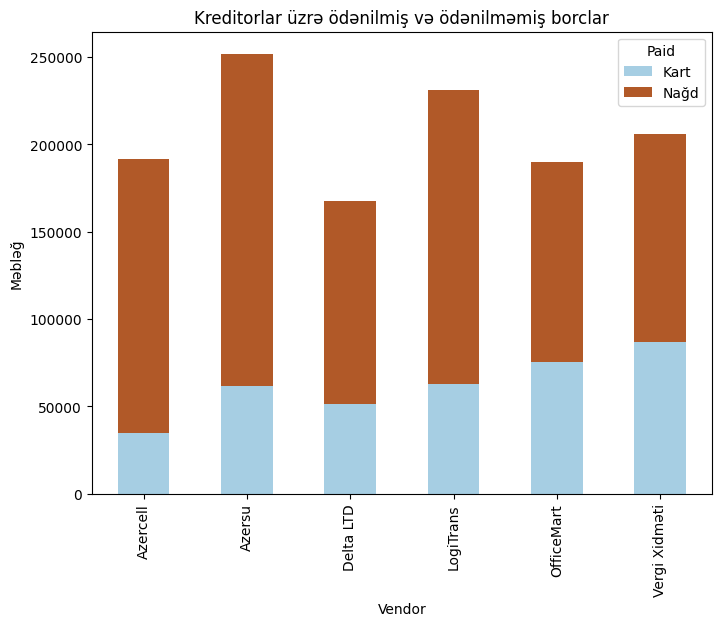

In [413]:
import matplotlib.pyplot as plt  #Kreditorlar üzrə ödənilmiş və ödənilməmiş borclar

paid_unpaid_by_vendor.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Paired')
plt.ylabel("Məbləğ")
plt.title("Kreditorlar üzrə ödənilmiş və ödənilməmiş borclar")
plt.show()

In [395]:
paid_unpaid_by_vendor = df_borc.groupby(['Vendor','Paid'])['Amount'].sum().unstack(fill_value=0)
print(paid_unpaid_by_vendor)
##Ödənilmiş və ödənilməmiş borcların məbləğləri

Paid            Kart    Nağd
Vendor                      
Azercell       34631  156928
Azersu         61392  190595
Delta LTD      51590  116129
LogiTrans      62906  168144
OfficeMart     75339  114383
Vergi Xidməti  87086  119095


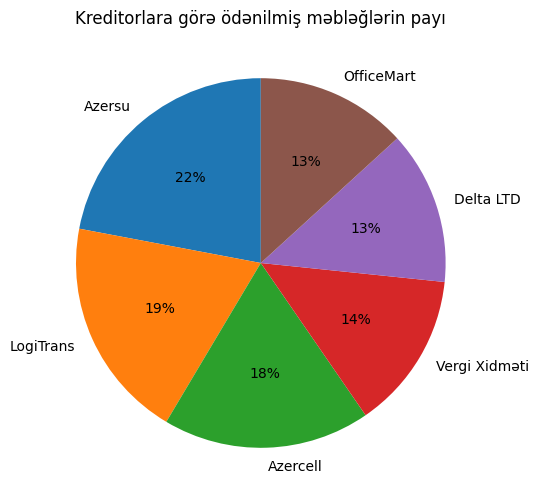

In [396]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.pie(
    total_paid_by_vendor,
    labels=total_paid_by_vendor.index,
    autopct="%1.0f%%",
    startangle=90
)
plt.title("Kreditorlara görə ödənilmiş məbləğlərin payı")
plt.show()

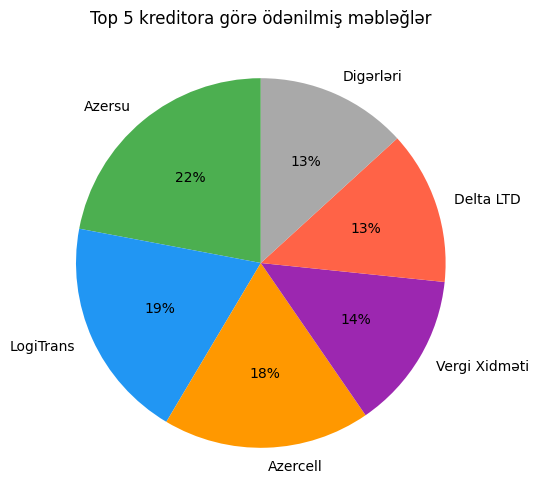

In [397]:
import matplotlib.pyplot as plt
import pandas as pd

#Top 5 kreditor
top5 = total_paid_by_vendor.head(5)

#Qalan şirkətləri "Digərləri" kimi əlavə edirik
others = total_paid_by_vendor[5:].sum()
top5_with_others = pd.concat([top5, pd.Series({"Digərləri": others})])

plt.figure(figsize=(8,6))
plt.pie(
    top5_with_others,
    labels=top5_with_others.index,
    autopct="%1.0f%%",
    startangle=90,
    colors=["#4CAF50", "#2196F3", "#FF9800", "#9C27B0", "#FF6347", "#A9A9A9"]
)
plt.title("Top 5 kreditora görə ödənilmiş məbləğlər")
plt.show()

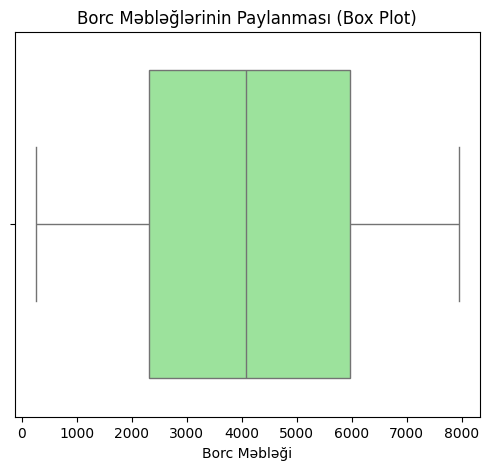

In [399]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Amount', data=df_borc, color='lightgreen')
plt.title("Borc Məbləğlərinin Paylanması (Box Plot)")
plt.xlabel("Borc Məbləği")
plt.show()

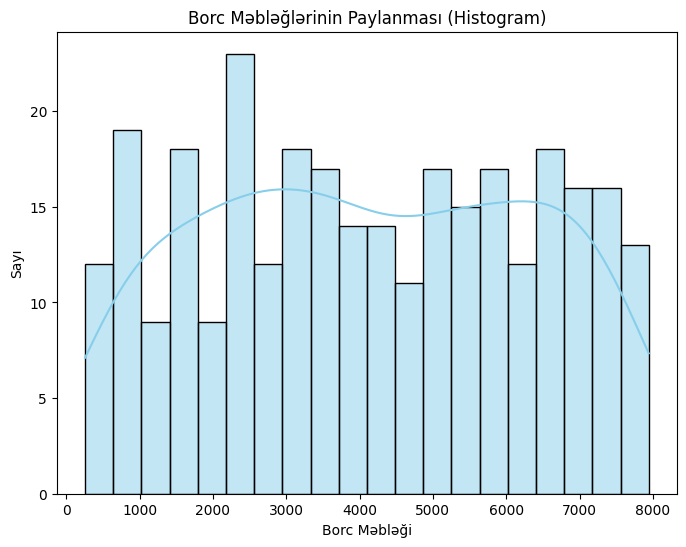

In [400]:
import matplotlib.pyplot as plt #Ən çox borc məbləği 3000-ə yaxındır
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df_borc['Amount'], bins=20, kde=True, color='skyblue')
plt.title("Borc Məbləğlərinin Paylanması (Histogram)")
plt.xlabel("Borc Məbləği")
plt.ylabel("Sayı")
plt.show()

In [401]:
# Hər bir ödəniş növünün sayını hesablayırıq
counts = df_borc["Paid"].value_counts()
print(counts)

# Ən çox rast gəlinən ödəniş növünü tapırıq
most_common = counts.idxmax()
print("Ən çox rast gəlinən Ödəniş növü:", most_common)

Paid
Nağd    202
Kart     98
Name: count, dtype: int64
Ən çox rast gəlinən Ödəniş növü: Nağd


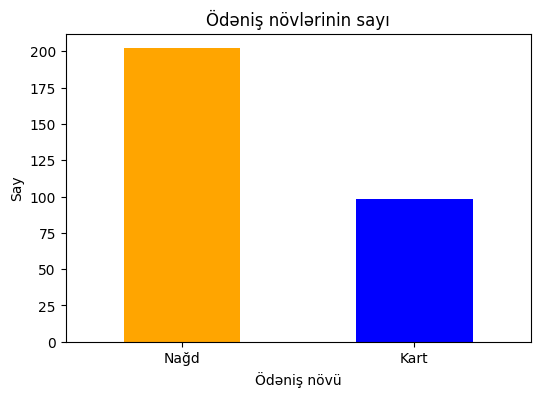

In [402]:
import matplotlib.pyplot as plt

# Ödəniş növünün sayını hesablayırıq
counts = df_borc["Paid"].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['orange','blue'])
plt.title("Ödəniş növlərinin sayı")
plt.xlabel("Ödəniş növü")
plt.ylabel("Say")
plt.xticks(rotation=0)
plt.show()